original


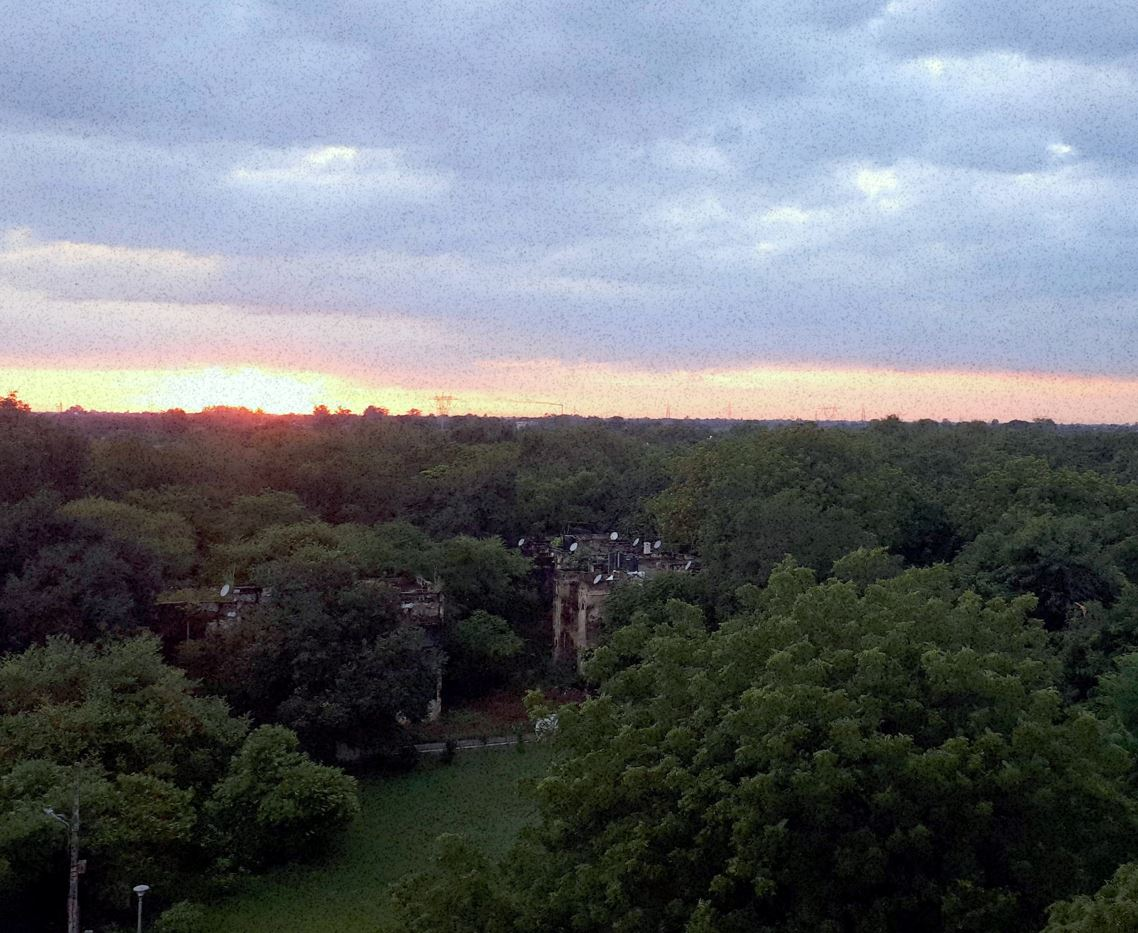

denoised


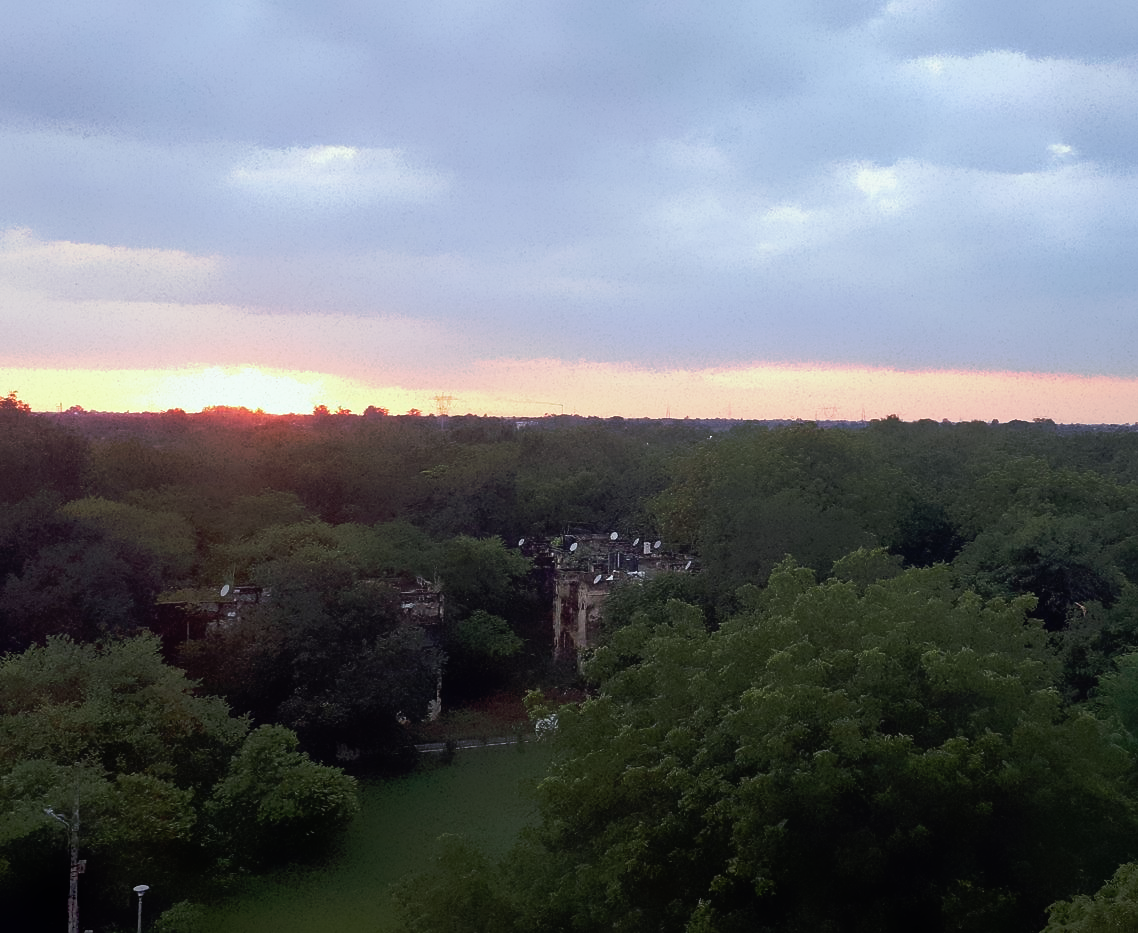

In [ ]:
import cv2
import numpy as np
import matplotlib as plt
import sys
from google.colab.patches import cv2_imshow

#file1= str(sys.argv[1])
#img = cv2.imread(file1)
file1= 'noisy2.JPG'
img=cv2.imread(file1)
print('original')
cv2_imshow(img)
lpf=cv2.GaussianBlur(img,(3,3),3)
hpf = cv2.subtract(img,lpf)

rgb_planes = cv2.split(img)
img3= []
p= file1[5]
if p=='1':
  for plane in rgb_planes:
     img1  = cv2.bilateralFilter(plane, 40,30,80)
     img3.append(img1)

if p=='2':
  for plane in rgb_planes:
     img1  = cv2.bilateralFilter(plane, 80,12, 18)
     img3.append(img1)

img3 = cv2.merge(img3)
gblur = cv2.GaussianBlur(img3,(3,3),0)
subt = cv2.subtract(img3, gblur)
edge= subt*1.05
final = cv2.add(img3, edge, dtype= cv2.CV_8U)
cv2.imwrite("denoised.jpg",final)
print('denoised')
cv2_imshow(final)